In [1]:
require('cowplot')
library('ggplot2')
theme_set(theme_gray()) # switch to default ggplot2 theme for good
theme_update(panel.background = element_rect(fill = "grey95"))

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
realdata <- read.csv(file.path('..', 'zmeta_rocs', 'results', 'realdata_TPR.csv'), header=T, sep=",")

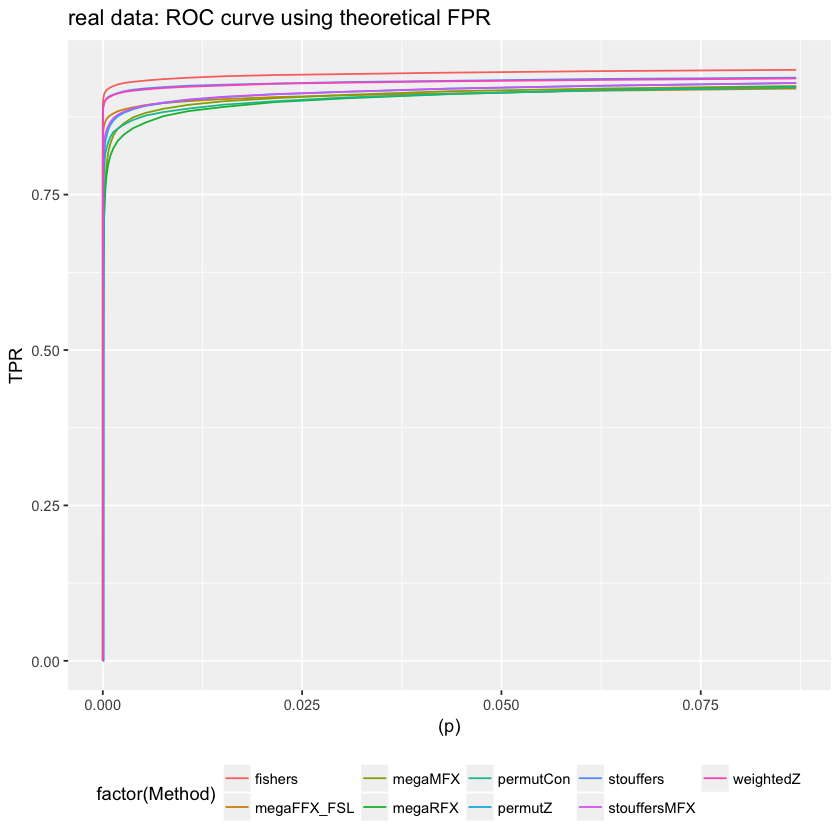

In [3]:
p <- ggplot(data=subset(realdata, p<0.1),aes(x=(p), y=TPR, group=Method, colour=factor(Method))) + 
geom_line() + ggtitle('real data: ROC curve using theoretical FPR') + theme(legend.position = 'bottom')

print(p)

In [4]:
simufpr <- read.csv(file.path('data', 'allsimudat_test1_k025_n20_nominal.csv'))

# Only looking at nominal data under some heterogeneity
simufpr <- subset(simufpr, Between==1 & unitMism=='nominal')

In [5]:
head(simufpr)

methods,glm,nStudies,nSubjects,Between,Within,nSubjectsSame,withinVariation,unitMism,soft2,⋯,rankP,expectedP,lnp,equivz,allgroups,expectedz,p_upper,z_upper,p_lower,z_lower
fishers,1,25,20,1,20,1,16,nominal,0,⋯,1,9.746589e-07,-49.52660,9.626282,1 20 25 20 1026000 16 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
fishers,1,25,20,1,20,1,16,nominal,0,⋯,2,1.949318e-06,-48.10786,9.479343,1 20 25 20 1026000 16 0 1 nominal,4.616714,2.360715e-07,5.037301,5.430440e-06,4.399284
fishers,1,25,20,1,20,1,16,nominal,0,⋯,3,2.923977e-06,-46.15251,9.273095,1 20 25 20 1026000 16 0 1 nominal,4.531813,6.029947e-07,4.854651,7.041588e-06,4.342560
fishers,1,25,20,1,20,1,16,nominal,0,⋯,4,3.898635e-06,-45.07518,9.157519,1 20 25 20 1026000 16 0 1 nominal,4.470676,1.062248e-06,4.741206,8.545076e-06,4.299866
fishers,1,25,20,1,20,1,16,nominal,0,⋯,5,4.873294e-06,-43.65503,9.002951,1 20 25 20 1026000 16 0 1 nominal,4.422720,1.582347e-06,4.659831,9.982025e-06,4.265292
fishers,1,25,20,1,20,1,16,nominal,0,⋯,6,5.847953e-06,-43.44453,8.979819,1 20 25 20 1026000 16 0 1 nominal,4.383181,2.146099e-06,4.596707,1.137261e-05,4.236084


In [6]:
realdata_withsimuFPR = data.frame()

for (within in unique(simufpr$Within)){
#     print(within)
for (variation in unique(simufpr$withinVariation)){
#     print(variation)
    currdat <- realdata
    currdat$withinVariation <- variation
    currdat$Between <- 1
    currdat$Within <- within
    currdat$FPR <- NA

    methods <- levels(realdata$Method)
    length(methods)
    
    for (meth in methods){
#         print(paste('Currently: ', meth))
        th_p = currdat[currdat$Method==meth,]$p
       
        sub_df = subset(simufpr, Between==1 & Within==within & withinVariation==variation & methods == meth)
        
        if (nrow(sub_df)>0){
            approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=th_p, yleft=0)
    #         plot(sub_df$P, sub_df$expectedP, main = "approx")
    #         points(approximated, col = 2, pch = "*")
            currdat[currdat$Method==meth,]$FPR <- approximated$y
        }
    }
    
#     currdat[currdat$p==0,]$FPR <- 0
#     print(currdat[currdat$p==0,]$FPR) 
    if (! all(is.na(currdat$FPR))){
        currdat[currdat$p==1,]$FPR <- 1
        realdata_withsimuFPR <- rbind(realdata_withsimuFPR, currdat)

    }
    
}
}

# for (within in setdiff(unique(simufpr$Within), c(20, 40))){
#     currdat <- realdata
#     currdat$withinVariation <- 1
#     currdat$Between <- 1
#     currdat$Within <- within
#     currdat$FPR <- NA

#     methods <- levels(realdata$Method)
#     length(methods)
    
#     for (meth in methods){
# #         print(paste('Currently: ', meth))
#         th_p = currdat[currdat$Method==meth,]$p
       
#         sub_df = subset(simufpr, Between==1 & Within==within & withinVariation==1 & methods == meth)
        
#         approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=th_p, yleft=0)
# #         plot(sub_df$P, sub_df$expectedP, main = "approx")
# #         points(approximated, col = 2, pch = "*")
#          currdat[currdat$Method==meth,]$FPR <- approximated$y

#     }
    
#     currdat[currdat$p==1,]$FPR <- 1
# #     print(currdat[currdat$p==0,]$FPR) 

#     realdata_withsimuFPR <- rbind(realdata_withsimuFPR, currdat)
# }

# simufpr_homo <- subset(simufpr, withinVariation==1 & Between==1 & Within==20)

# simufpr_out16 <- subset(simufpr, withinVariation==16 & Between==1) 
# names(simufpr_out16)

# print(levels(simufpr_out16$methods))
# print('--')
# print(levels(realdata$Method))



In [7]:
tail(realdata_withsimuFPR[is.na(realdata_withsimuFPR$FPR),])

Method,p,TPR,withinVariation,Between,Within,FPR


In [8]:
unique(simufpr$Within)

[1] 20 80 40 10  5

In [9]:
head(subset(realdata_withsimuFPR, Method=='permutCon'))

,Method,p,TPR,withinVariation,Between,Within,FPR
708,permutCon,0.000000e+00,0,16,1,20,0
709,permutCon,1.000000e-15,0,16,1,20,0
710,permutCon,1.417474e-15,0,16,1,20,0
711,permutCon,2.009233e-15,0,16,1,20,0
712,permutCon,2.848036e-15,0,16,1,20,0
713,permutCon,4.037017e-15,0,16,1,20,0


In [10]:
realdata_withsimuFPR$heterogeneity <- realdata_withsimuFPR$Between/realdata_withsimuFPR$Within*20

pdf 
  2

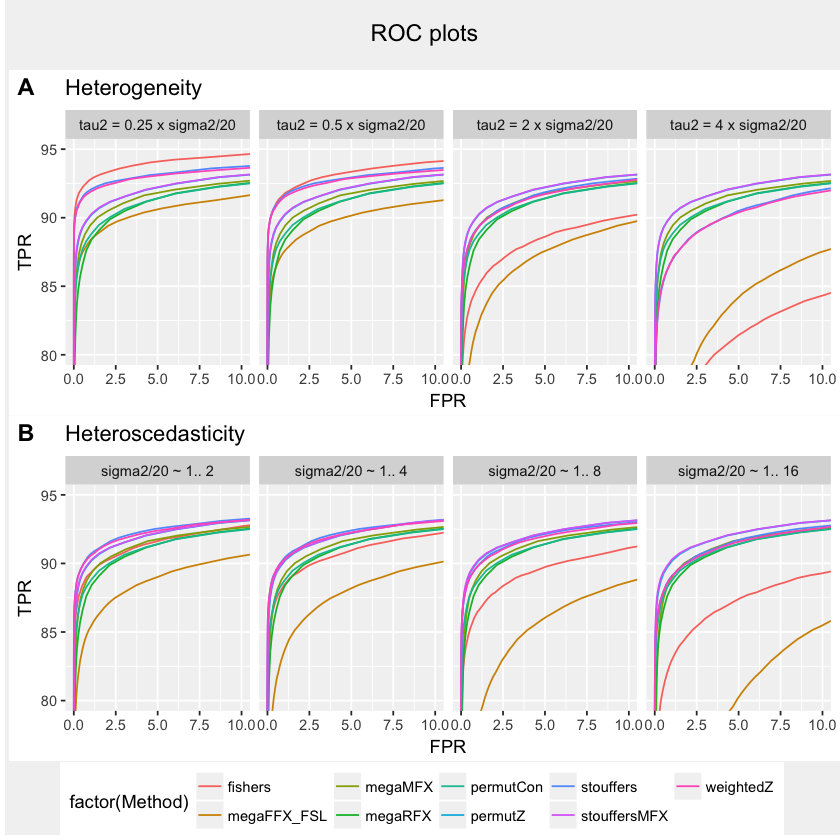

In [17]:
heterogeneity_labels <- function(value) {
    value <- paste("tau2 =", value, 'x sigma2/20')
    value
}

heteroscedasticity_labels <- function(value) {
    value <- paste("sigma2/20 ~ 1..", value)
    value
}

method_labels <- function(string) {
    string[string=="megaMFX"] <- "MFX"
    string[string=="megaRFX"] <- "RFX"
    string[string=="permutCon"] <- "Perm. E"
    string[string=="permutZ"] <- "Perm. Z"
    string[string=="stouffers"] <- "Stouffer's"
    string[string=="fishers"] <- "Fisher's"
    string[string=="fishers"] <- "Fisher's"
    string[string=="weightedZ"] <- "Weighted Z"
    string[string=="megaFFX_FSL"] <- "FFX"
    string
}

roc_plot <- function(data, aes_line) {
# print(names(data))
# print(("p" %in% names(data)))
    if ("p" %in% names(data)){
        data$p <- data$p*100
    } 

#     print("FPR" %in% names(data))
    
    if ("FPR" %in% names(data)){
        data$FPR <- data$FPR*100
    } 
    
    data$TPR <- data$TPR*100
    
    p <- ggplot(data=data,aes(group=Method, colour=factor(Method))) + 
    geom_line(aes_line)   + coord_cartesian(xlim = c(0, 10), ylim = c(80, 95)) 
    return(p)
}
    

roc_plots <- function(data){
              
#     # Panel A: Against theoretical FPR
#     p1 <- roc_plot(subset(realdata, p<0.1 & TPR>0.8), aes(x=p, y=TPR)) + 
#             theme(legend.position="bottom", legend.direction='vertical') + coord_fixed(ratio = 1)
    
#     # Panel B: Against simulated FPR & under varying levels of heterogenerity
#     p1 <- roc_plot(subset(realdata_withsimuFPR, withinVariation==1 & Within==20), aes(x=FPR, y=TPR)) + 
#             facet_grid(.~heterogeneity, labeller = labeller(withinVariation = group_var_labels)) + ggtitle('Homo') + theme(legend.position="none") +
#             theme(legend.position="bottom", legend.direction='vertical')
    
    # Panel B: Against simulated FPR & under varying levels of heterogenerity
    p2 <- roc_plot(subset(realdata_withsimuFPR, withinVariation==1 & Within!=20), aes(x=FPR, y=TPR)) + 
            facet_grid(.~heterogeneity, labeller = labeller(heterogeneity = heterogeneity_labels,
                           withinVariation = heteroscedasticity_labels)) + ggtitle('Heterogeneity') + theme(legend.position="none") 
#     p2 <- ggplot(data=subset(realdata_withsimuFPR, FPR<=0.10 & TPR>0.75 & withinVariation==1),
#             aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + geom_point(size=0.02) + geom_line() + 
            

    # Panel C: Against simulated FPR & under heteroscedasticity
    p3 <- roc_plot(subset(realdata_withsimuFPR, withinVariation>1), aes(x=FPR, y=TPR)) + 
            facet_grid(.~withinVariation, labeller = labeller(heterogeneity = heterogeneity_labels,
                           withinVariation = heteroscedasticity_labels)) + ggtitle('Heteroscedasticity') + theme(legend.position="none")

#     ggplot(data=subset(realdata_withsimuFPR, FPR<=0.10 & TPR>0.75 & withinVariation>1),
#             aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + 
#     geom_point(size=0.02) + geom_line() + 

    
    # Organise the figure: title, panel A at the top, panel B and C in a second row
#     right_column <- plot_grid(p1, labels = 'A', ncol=1)
   
    
    left_column <- plot_grid(p2, p3, labels = c('A', 'B'), ncol=1)
    
#     p <- plot_grid(right_column, left_column, labels = ' ', ncol=2, rel_widths=c(1, 3))
    title <- ggdraw() + draw_label('ROC plots')
    legend <- get_legend(p3 + theme(legend.position="bottom"))
#     p <- plot_grid(p, legend, ncol = 1, rel_heights = c(1, .2))
    
    p <- plot_grid(title, left_column, legend, ncol=1, rel_heights=c(0.1, 1, 0.1)) + 
        theme(plot.title=element_text(size=12), text=element_text(size=10))

    return(p)
}

p <- roc_plots(realdata)

# print on screen
print(p)

# Save to pdf
pdf(paste("roc.pdf", sep=""))
print(p)
dev.off()

In [12]:
simple_auc <- function(sens, spec){
#     Sources: https://stats.stackexchange.com/questions/145566/how-to-calculate-area-under-the-curve-auc-or-the-c-statistic-by-hand
#     print(order(sens, spec))
    
    height = (sens[-1]+sens[-length(sens)])/2
    width = -diff(spec) # = diff(rev(omspec))
    sum(height*width)
}

In [13]:
my_dat <- (subset(realdata_withsimuFPR, Method=='megaRFX' & withinVariation==16))
simple_auc(my_dat$TPR, 1-my_dat$FPR)

[1] 0.951057

In [14]:
auc_df <- data.frame()

for (within in unique(realdata_withsimuFPR$Within)){
    for (variation in unique(realdata_withsimuFPR$withinVariation)){

        methods <- levels(realdata_withsimuFPR$Method)

        for (meth in methods){

            sub_df = subset(realdata_withsimuFPR, Between==1 & Within==within & withinVariation==variation & Method == meth)
            if (nrow(sub_df)>0){
#                 print(head(sub_df))
        #         print(length(sub_df$TPR))
        #         print(unique(sub_df$Method))
                auc_value = simple_auc(sub_df$TPR, 1-sub_df$FPR)
                auc_df <- rbind(auc_df, data.frame(withinVariation = variation, 
                                                   Within = within,
                                                  Between=1,
                                                  auc=auc_value,
                                              methods=meth))
            }
    }
    }
}

head(auc_df)

withinVariation,Within,Between,auc,methods
16,20,1,0.9342454,fishers
16,20,1,0.9284542,megaFFX_FSL
16,20,1,0.9509740,megaMFX
16,20,1,0.9510570,megaRFX
16,20,1,0.9506532,permutCon
16,20,1,0.9539445,permutZ


In [15]:
print(auc_df[(auc_df$auc)>1,])

[1] withinVariation Within          Between         auc            
[5] methods        
<0 rows> (or 0-length row.names)


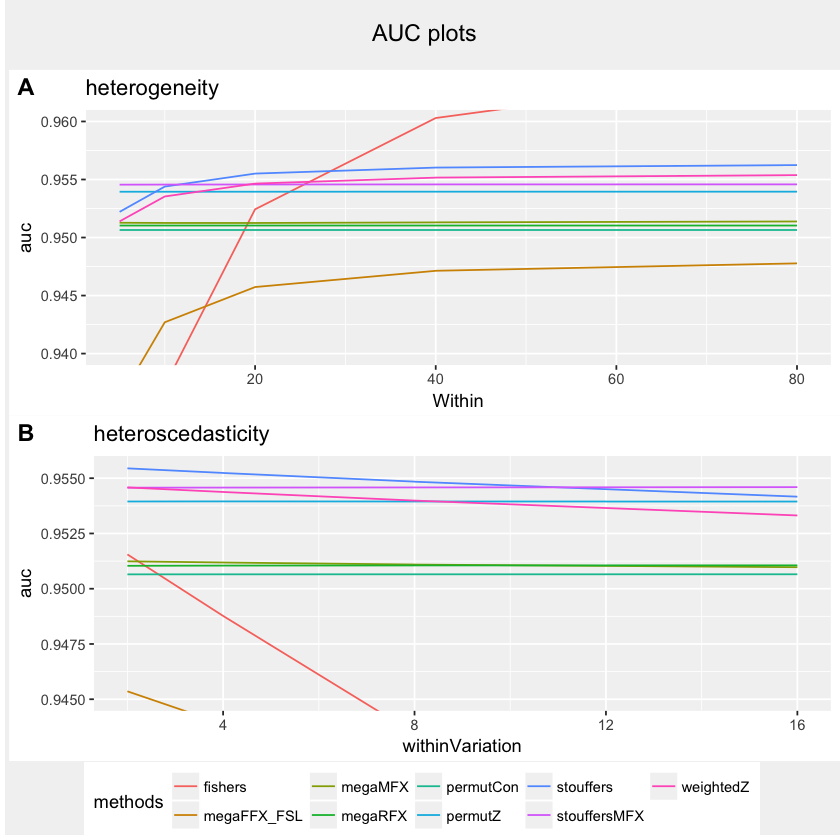

In [16]:
# p <- ggplot(data=auc_df, aes=aes(x=Within, y=auc_value)) + geom_point()
# print(p)

p1 <- ggplot(data=subset(auc_df,withinVariation==1),aes(x=Within, y=auc, group=methods, colour=methods)) + 
geom_line() + ggtitle('heterogeneity') + theme(legend.position = 'none') + 
coord_cartesian(ylim = c(0.94, 0.96)) 

p2 <- ggplot(data=subset(auc_df,withinVariation>1),aes(x=withinVariation, y=auc, group=methods, colour=methods)) + 
geom_line() + ggtitle('heteroscedasticity') + theme(legend.position = 'none') + 
coord_cartesian(ylim = c(0.945, 0.9555)) 

row <- plot_grid(p1, p2, labels = c('A', 'B'), ncol=1)
    
title <- ggdraw() + draw_label('AUC plots')
legend <- get_legend(p1 + theme(legend.position="bottom"))
#     p <- plot_grid(p, legend, ncol = 1, rel_heights = c(1, .2))
    
p <- plot_grid(title, row, legend, ncol=1, rel_heights=c(0.1, 1, 0.1)) + 
        theme(plot.title=element_text(size=12), text=element_text(size=10))


print(p)